In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Importing data

In [31]:
df = pd.read_csv("GraduateEmploymentSurvey.csv")
df

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816
...,...,...,...,...,...,...,...,...,...,...,...,...
1396,2023,Singapore Institute of Technology,SIT-University of Glasgow,Bachelor of Engineering with Honours in Aerosp...,77.5%,67.5%,4128,4000,4218,4100,3800,4500
1397,2023,Singapore Institute of Technology,SIT-University of Glasgow,Bachelor of Engineering with Honours in Civil ...,89.4%,84.7%,4010,4000,4185,4050,3800,4500
1398,2023,Singapore Institute of Technology,SIT-University of Glasgow,Bachelor of Engineering with Honours in Mechan...,72.9%,68.8%,4369,4400,4462,4400,4000,4800
1399,2023,Singapore Institute of Technology,SIT-University of Glasgow,Bachelor of Science with Honours in Computing ...,74.4%,67.1%,4830,4800,4932,4800,4500,5000


### Data stats

In [32]:
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.isna().sum())

(1401, 12)
Index(['year', 'university', 'school', 'degree', 'employment_rate_overall',
       'employment_rate_ft_perm', 'basic_monthly_mean', 'basic_monthly_median',
       'gross_monthly_mean', 'gross_monthly_median',
       'gross_mthly_25_percentile', 'gross_mthly_75_percentile'],
      dtype='object')
year                          int64
university                   object
school                       object
degree                       object
employment_rate_overall      object
employment_rate_ft_perm      object
basic_monthly_mean           object
basic_monthly_median         object
gross_monthly_mean           object
gross_monthly_median         object
gross_mthly_25_percentile    object
gross_mthly_75_percentile    object
dtype: object
year                         0
university                   0
school                       0
degree                       0
employment_rate_overall      0
employment_rate_ft_perm      0
basic_monthly_mean           0
basic_monthly_median         

# Data cleaning

### Convert columns to correct datatype

In [33]:
num_cols = ['employment_rate_overall', 
            'employment_rate_ft_perm', 
            'basic_monthly_mean', 
            'basic_monthly_median', 
            'gross_monthly_mean', 
            'gross_monthly_median', 
            'gross_mthly_25_percentile', 
            'gross_mthly_75_percentile'
            ]

df = df.copy()

for col in num_cols:
    df[col] = df[col].str.replace('[$,%]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce') # coerce converts unconvertable rows to nan values

print(df.isna().sum())

year                          0
university                    0
school                        0
degree                        0
employment_rate_overall      99
employment_rate_ft_perm      99
basic_monthly_mean           99
basic_monthly_median         99
gross_monthly_mean           99
gross_monthly_median         99
gross_mthly_25_percentile    99
gross_mthly_75_percentile    99
dtype: int64


nan count is consistent throughout the rows

In [34]:
df

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701.0,3200.0,3727.0,3350.0,2900.0,4000.0
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850.0,2700.0,2938.0,2700.0,2700.0,2900.0
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053.0,3000.0,3214.0,3000.0,2700.0,3500.0
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557.0,3400.0,3615.0,3400.0,3000.0,4100.0
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494.0,3500.0,3536.0,3500.0,3100.0,3816.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1396,2023,Singapore Institute of Technology,SIT-University of Glasgow,Bachelor of Engineering with Honours in Aerosp...,77.5,67.5,4128.0,4000.0,4218.0,4100.0,3800.0,4500.0
1397,2023,Singapore Institute of Technology,SIT-University of Glasgow,Bachelor of Engineering with Honours in Civil ...,89.4,84.7,4010.0,4000.0,4185.0,4050.0,3800.0,4500.0
1398,2023,Singapore Institute of Technology,SIT-University of Glasgow,Bachelor of Engineering with Honours in Mechan...,72.9,68.8,4369.0,4400.0,4462.0,4400.0,4000.0,4800.0
1399,2023,Singapore Institute of Technology,SIT-University of Glasgow,Bachelor of Science with Honours in Computing ...,74.4,67.1,4830.0,4800.0,4932.0,4800.0,4500.0,5000.0


In [35]:
df_clean = df.copy()

df_clean = df.dropna()
df_nan = df[df.isna().any(axis=1)]

In [36]:
df_nan

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
24,2013,Nanyang Technological University,College of Sciences,Biomedical Sciences **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2013,Nanyang Technological University,College of Sciences,Mathematics & Economics **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,2013,National University of Singapore,School of Computing,Bachelor of Computing (Computational Biology) **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,2013,National University of Singapore,School of Computing,Bachelor of Computing (Computer Engineering) **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,2013,National University of Singapore,School of Design & Environment,Bachelor of Arts (Architecture) ** #,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,2023,National University of Singapore,College of Design and Engineering,Bachelor of Arts (Architecture)#**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1295,2023,National University of Singapore,Yong Loo Lin School (Medicine),Bachelor of Medicine and Bachelor of\r\nSurger...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1342,2023,Nanyang Technological University,Lee Kong Chian School of Medicine,Medicine#**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1359,2023,Singapore University of Social Sciences,S R Nathan School of Human Development,Bachelor of Social Work**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


SUTD is missing a school column, so the degree would be copied over for easier data processing

In [37]:
df_clean['school'] = df_clean['school'].replace('na', np.nan)
sutd_mask = (df_clean['university'] == 'Singapore University of Technology and Design') & (df_clean['school'].isnull())
df_clean.loc[sutd_mask, 'school'] = df_clean.loc[sutd_mask, 'degree']

C:\Users\limjj\AppData\Local\Temp\ipykernel_26816\490458010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['school'] = df_clean['school'].replace('na', np.nan)


In [38]:
# df_clean[df_clean['university'] == 'Singapore University of Technology and Design']
# df_clean

### University groupby
This section is meant for easy reference to other universites as they have different conventions for degrees and schools 

In [39]:
uni_dict = {}
df_uni_grouped = df_clean.groupby('university')
for university_name, university_df in df_uni_grouped:
    uni_dict[university_name] = university_df
for key in uni_dict.keys():
    print(key)

Nanyang Technological University
National University of Singapore
Singapore Institute of Technology
Singapore Management University
Singapore University of Social Sciences
Singapore University of Technology and Design


# Data Exploration

### Our mapping
Business & Accountancy\
Engineering\
IT\
Humanities, Arts & Social Sciences\
Science\
Law\
Medicine & Health Sciences\
Architecture & Design\
Education\
Other Specialized Schools\

In [40]:
for uni in uni_dict.keys():
    print(uni)
    print(uni_dict[uni]["school"].unique())
    print()

Nanyang Technological University
['College of Business (Nanyang Business School)' 'College of Engineering'
 'College of Humanities, Arts & Social Sciences' 'College of Sciences'
 'National Institute of Education (NIE)' 'Sports Science and Management'
 'Lee Kong Chian School of Medicine' 'College of Science']

National University of Singapore
['Faculty of Arts & Social Sciences' 'NUS Business School'
 'School of Computing' 'Faculty of Dentistry'
 'School of Design & Environment' 'Faculty of Engineering'
 'Faculty of Law' 'YLL School of Medicine' 'Faculty of Science'
 'Yong Siew Toh Conservatory of Music' 'Multi-Disciplinary Programme'
 'Faculty Of Dentistry' 'Faculty Of Engineering'
 'Yong Loo Lin School (Medicine)' 'YST Conservatory Of Music'
 'Yale-NUS College' 'Multi-Disciplinary Programmes'
 'Multidisciplinary Programmes' 'YST Conservatory of Music'
 'College of Design and Engineering']

Singapore Institute of Technology
['DigiPen Institute of Technology' 'The Glasgow School of Art'

In [41]:
school_mapping = {
    # Nanyang Technological University
    'College of Business (Nanyang Business School)': 'Business & Accountancy',
    'College of Engineering': 'Engineering',
    'College of Humanities, Arts & Social Sciences': 'Humanities, Arts & Social Sciences',
    'College of Sciences': 'Science',
    'College of Science': 'Science',  # Added for completeness
    'National Institute of Education (NIE)': 'Education',
    'Sports Science and Management': 'Other Specialized Schools',
    'Lee Kong Chian School of Medicine': 'Medicine & Health Sciences',

    # National University of Singapore
    'Faculty of Arts & Social Sciences': 'Humanities, Arts & Social Sciences',
    'Yale-NUS College': 'Humanities, Arts & Social Sciences',
    'NUS Business School': 'Business & Accountancy',
    'School of Computing': 'IT',
    'Faculty of Dentistry': 'Medicine & Health Sciences',
    'Faculty Of Dentistry': 'Medicine & Health Sciences',
    'YLL School of Medicine': 'Medicine & Health Sciences',
    'Yong Loo Lin School (Medicine)': 'Medicine & Health Sciences',
    'School of Design & Environment': 'Architecture & Design',
    'College of Design and Engineering': 'Architecture & Design',
    'Faculty of Engineering': 'Engineering',
    'Faculty Of Engineering': 'Engineering',
    'Faculty of Law': 'Law',
    'Faculty of Science': 'Science',
    'Yong Siew Toh Conservatory of Music': 'Other Specialized Schools',
    'YST Conservatory Of Music': 'Other Specialized Schools',
    'YST Conservatory of Music': 'Other Specialized Schools',
    'Multi-Disciplinary Programme': 'Other Specialized Schools',
    'Multi-Disciplinary Programmes': 'Other Specialized Schools',
    'Multidisciplinary Programmes': 'Other Specialized Schools',

    # Singapore Management University
    'School of Accountancy (4-year programme) *': 'Business & Accountancy',
    'School of Accountancy (4-years programme) *': 'Business & Accountancy',
    'School of Business (4-year programme) *': 'Business & Accountancy',
    'School of Business (4-years programme) *': 'Business & Accountancy',
    'School of Economics (4-year programme) *': 'Humanities, Arts & Social Sciences',
    'School of Economics (4-years programme) *': 'Humanities, Arts & Social Sciences',
    'School of Social Sciences (4-year programme) *': 'Humanities, Arts & Social Sciences',
    'School of Social Sciences (4-years programme) *': 'Humanities, Arts & Social Sciences',
    'School of Information Systems (4-year programme) *': 'IT',
    'School of Information Systems (4-years programme) *': 'IT',
    'School of Computing & Information Systems (4-year programme)  Information Systems *': 'IT',
    'School of Computing & Information Systems (4-year programme)  Computer Science *': 'IT',
    'School of Law (4-year programme) *': 'Law',
    'School of Law (4-years programme) *': 'Law',

    # Singapore Institute of Technology
    'DigiPen Institute of Technology': 'IT',
    'SIT-DigiPen Institute of Technology': 'IT',
    'SIT- DigiPen Institute of Technology': 'IT',
    'The Glasgow School of Art': 'Architecture & Design',
    'Newcastle University': 'Engineering',
    'SIT-Newcastle University': 'Engineering',
    'SIT- Newcastle University': 'Engineering',
    'Technische Universität München': 'Engineering',
    'University of Glasgow': 'Engineering',
    'SIT-University of Glasgow': 'Engineering',
    'The Culinary Institute of America': 'Other Specialized Schools',
    'Culinary Institute of America': 'Other Specialized Schools',
    'Trinity College Dublin': 'Medicine & Health Sciences',
    'University of Manchester': 'Medicine & Health Sciences',
    'Singapore Institute of Technology -Trinity College Dublin': 'Medicine & Health Sciences',
    'Trinity College Dublin / Singapore Institute of Technology-Trinity College Dublin': 'Medicine & Health Sciences',
    'Singapore Institute of Technology -Trinity College Dublin / Trinity College Dublin': 'Medicine & Health Sciences',
    'SIT-Trinity College Dublin / Trinity College Dublin': 'Medicine & Health Sciences',
    'SIT / SIT-Trinity College Dublin / Trinity College Dublin': 'Medicine & Health Sciences',
    'SIT-Trinity College Dublin': 'Medicine & Health Sciences',
    'University of Nevada, Las Vegas': 'Business & Accountancy',
    'Wheelock College': 'Education',
    'University of Liverpool': 'Humanities, Arts & Social Sciences',
    'SIT-Massey University': 'Science',
    'SIT- Massey University': 'Science',
    'Singapore Institute of Technology': 'Other Specialized Schools',
    'Singapore Institute of Technology (SIT)': 'Other Specialized Schools',

    # Singapore University of Social Sciences
    'School of Business': 'Business & Accountancy',
    'S R Nathan School of Human Development': 'Humanities, Arts & Social Sciences',
    'School of Humanities and Behavioural Sciences': 'Humanities, Arts & Social Sciences',

    # Singapore University of Technology and Design (Degrees mapped directly)
    'Bachelor of Engineering (Engineering Product Development)': 'Engineering',
    'Bachelor of Engineering (Engineering Systems and Design)': 'Engineering',
    'Bachelor of Engineering (Information Systems Technology and Design)': 'IT',
    'Bachelor of Engineering (Computer Science and Design)': 'IT',
    'Bachelor of Science (Architecture and Sustainable Design)': 'Architecture & Design',
    'Bachelor of Science (Architecture and Sustainable Design) ###': 'Architecture & Design'
}

In [42]:
# df_clean should be your DataFrame after handling NaNs and numeric conversions
df_mapped = df_clean.copy()

# 1. Map all schools using the dictionary
df_mapped['school_group'] = df_mapped['school'].map(school_mapping)

# 2. Handle SUTD separately by mapping its 'degree' column
sutd_mask = df_mapped['university'] == 'Singapore University of Technology and Design'
df_mapped.loc[sutd_mask, 'school_group'] = df_mapped.loc[sutd_mask, 'degree'].map(school_mapping)

# 3. Override for any other 'Computer Science' or 'Computer Engineering' degrees
# This ensures they are always categorized as 'IT' regardless of their school
it_degree_mask = df_mapped['degree'].str.contains('Computer Science|Computer Engineering', case=False, na=False)
df_mapped.loc[it_degree_mask, 'school_group'] = 'IT'

# 4. Fill any remaining unmapped schools as 'Other Specialized Schools'
df_mapped['school_group'] = df_mapped['school_group'].fillna('Other Specialized Schools')

df_mapped

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,school_group
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701.0,3200.0,3727.0,3350.0,2900.0,4000.0,Business & Accountancy
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850.0,2700.0,2938.0,2700.0,2700.0,2900.0,Business & Accountancy
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053.0,3000.0,3214.0,3000.0,2700.0,3500.0,Business & Accountancy
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557.0,3400.0,3615.0,3400.0,3000.0,4100.0,Business & Accountancy
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494.0,3500.0,3536.0,3500.0,3100.0,3816.0,Engineering
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,2023,Singapore Institute of Technology,SIT-University of Glasgow,Bachelor of Engineering with Honours in Aerosp...,77.5,67.5,4128.0,4000.0,4218.0,4100.0,3800.0,4500.0,Engineering
1397,2023,Singapore Institute of Technology,SIT-University of Glasgow,Bachelor of Engineering with Honours in Civil ...,89.4,84.7,4010.0,4000.0,4185.0,4050.0,3800.0,4500.0,Engineering
1398,2023,Singapore Institute of Technology,SIT-University of Glasgow,Bachelor of Engineering with Honours in Mechan...,72.9,68.8,4369.0,4400.0,4462.0,4400.0,4000.0,4800.0,Engineering
1399,2023,Singapore Institute of Technology,SIT-University of Glasgow,Bachelor of Science with Honours in Computing ...,74.4,67.1,4830.0,4800.0,4932.0,4800.0,4500.0,5000.0,Engineering


In [49]:
df_mapped.columns

Index(['year', 'university', 'school', 'degree', 'employment_rate_overall',
       'employment_rate_ft_perm', 'basic_monthly_mean', 'basic_monthly_median',
       'gross_monthly_mean', 'gross_monthly_median',
       'gross_mthly_25_percentile', 'gross_mthly_75_percentile',
       'school_group'],
      dtype='object')

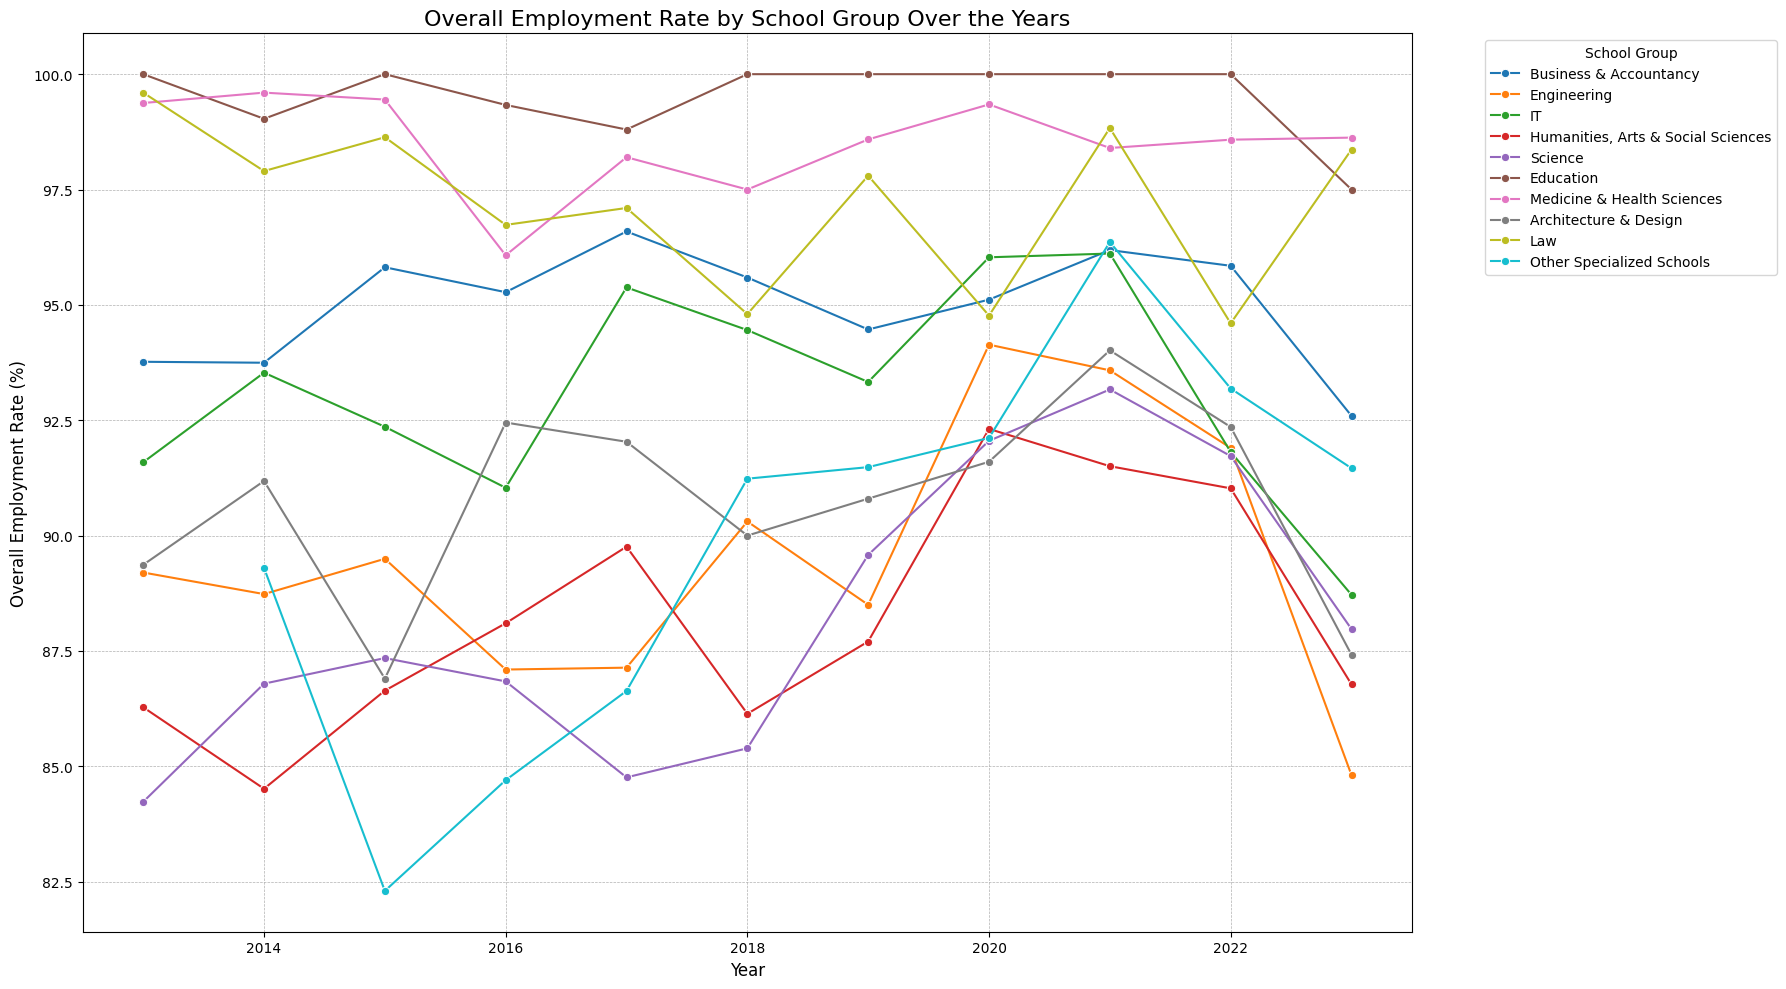

In [ ]:
# --- 4. Plot the Line Graph ---
plt.figure(figsize=(18, 10))
sns.lineplot(x='year', y='gross_monthly_mean', hue='school_group', data=df_mapped, errorbar=None, marker='o')

plt.title('Overall Employment Rate by School Group Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Overall Employment Rate (%)', fontsize=12)
plt.legend(title='School Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()

In [50]:
df_mapped.columns

Index(['year', 'university', 'school', 'degree', 'employment_rate_overall',
       'employment_rate_ft_perm', 'basic_monthly_mean', 'basic_monthly_median',
       'gross_monthly_mean', 'gross_monthly_median',
       'gross_mthly_25_percentile', 'gross_mthly_75_percentile',
       'school_group'],
      dtype='object')

In [ ]:
plt.figure(figsize=(18, 10))
sns.lineplot(x='year', y='basic_monthly_mean', hue='school_group', data=df_mapped, errorbar=None, marker='o')

plt.title('Basic Monthly Mean Salary by School Group Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Monthly Salary (SGD)', fontsize=12)
plt.legend(title='School Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
plt.figure(figsize=(18, 10))
sns.lineplot(x='year', y='basic_monthly_mean', hue='school_group', data=df_mapped, errorbar=None, marker='o')

plt.title('Basic Monthly Median Salary by School Group Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Monthly Salary (SGD)', fontsize=12)
plt.legend(title='School Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()

# Nan Exploration

In [44]:
df_nan

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
24,2013,Nanyang Technological University,College of Sciences,Biomedical Sciences **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2013,Nanyang Technological University,College of Sciences,Mathematics & Economics **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,2013,National University of Singapore,School of Computing,Bachelor of Computing (Computational Biology) **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,2013,National University of Singapore,School of Computing,Bachelor of Computing (Computer Engineering) **,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,2013,National University of Singapore,School of Design & Environment,Bachelor of Arts (Architecture) ** #,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,2023,National University of Singapore,College of Design and Engineering,Bachelor of Arts (Architecture)#**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1295,2023,National University of Singapore,Yong Loo Lin School (Medicine),Bachelor of Medicine and Bachelor of\r\nSurger...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1342,2023,Nanyang Technological University,Lee Kong Chian School of Medicine,Medicine#**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1359,2023,Singapore University of Social Sciences,S R Nathan School of Human Development,Bachelor of Social Work**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_nan["university"]

24             Nanyang Technological University
28             Nanyang Technological University
42             National University of Singapore
43             National University of Singapore
49             National University of Singapore
                         ...                   
1291           National University of Singapore
1295           National University of Singapore
1342           Nanyang Technological University
1359    Singapore University of Social Sciences
1366    Singapore University of Social Sciences
Name: university, Length: 99, dtype: object

### Mask

In [46]:
school_to_group_mapping = {
    # Engineering Group
    'College of Engineering': 'Engineering',
    'Faculty of Engineering': 'Engineering',
    'SIT-Newcastle University': 'Engineering',
    'Technische Universität München': 'Engineering',

    # IT Group
    'School of Computing': 'IT',
    'DigiPen Institute of Technology': 'IT',

    # Science Group
    'Faculty of Science': 'Science',
    'College of Sciences': 'Science',

    # Medicine & Health Sciences Group
    'Yong Loo Lin School (Medicine)': 'Medicine & Health Sciences',
    'YLL School of Medicine': 'Medicine & Health Sciences',
    'Lee Kong Chian School of Medicine': 'Medicine & Health Sciences',
    'SIT-Trinity College Dublin / Trinity College Dublin': 'Medicine & Health Sciences',
    'Singapore Institute of Technology -Trinity College Dublin / Trinity College Dublin': 'Medicine & Health Sciences',
    'Trinity College Dublin / Singapore Institute of Technology-Trinity College Dublin': 'Medicine & Health Sciences',
    'Trinity College Dublin': 'Medicine & Health Sciences',

    # Architecture & Design Group
    'School of Design & Environment': 'Architecture & Design',
    'College of Design and Engineering': 'Architecture & Design',

    # Law Group
    'School of Law': 'Law',

    # Humanities, Arts & Social Sciences Group
    'College of Humanities, Arts & Social Sciences': 'Humanities, Arts & Social Sciences',
    'S R Nathan School of Human Development': 'Humanities, Arts & Social Sciences',

    # Other Specialized Schools Group
    'Yong Siew Toh Conservatory of Music': 'Other Specialized Schools',
    'na': 'Other Specialized Schools', # Grouping 'na' as other for now
}

In [47]:
df_nan['school_group'] = df_nan['school'].map(school_to_group_mapping)

# You can fill any schools not in the dictionary with a default value
df_nan['school_group'] = df_nan['school_group'].fillna('Other Specialized Schools')

C:\Users\limjj\AppData\Local\Temp\ipykernel_26816\1948636482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['school_group'] = df_nan['school'].map(school_to_group_mapping)
C:\Users\limjj\AppData\Local\Temp\ipykernel_26816\1948636482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['school_group'] = df_nan['school_group'].fillna('Other Specialized Schools')


In [48]:
print(f"School groups: \n{df_nan['school_group'].value_counts()}")
print(f"Years: \n{df_nan['year'].value_counts()}")

School groups: 
school_group
Engineering                           34
IT                                    21
Science                               19
Medicine & Health Sciences            13
Other Specialized Schools              5
Architecture & Design                  3
Humanities, Arts & Social Sciences     2
Law                                    2
Name: count, dtype: int64
Years: 
year
2017    17
2018    16
2019    15
2015    14
2016    12
2013     8
2023     7
2014     6
2022     3
2021     1
Name: count, dtype: int64
